# Make table comparing with observations
author: [Mathieu Renzo](mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *


In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_30_M2_17_P100_Z0.01/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/weak_wind/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/do_J_accretion/"
binary = folder+"/binary_to_postRLOF/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

re-run\_exponential


(0, 20.081512066973072)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


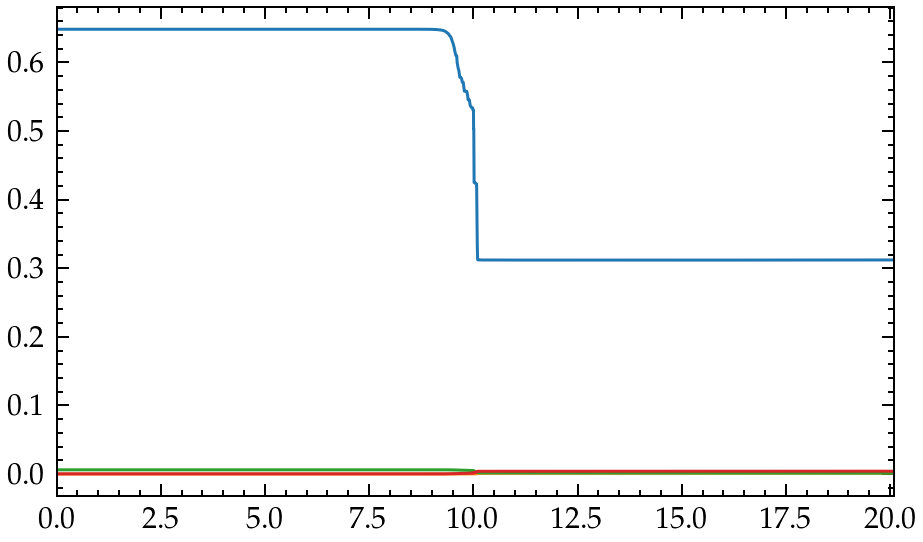

In [10]:
pfile = accretor+'/LOGS/profile11.data'
src, col = getSrcCol(pfile)
# print(col)
# dq = src[:, col.index('dq')]
mass = src[:, col.index("mass")]
he4 = src[:, col.index('he4')]
c12 = src[:, col.index('c12')]
n14 = src[:, col.index('n14')]
o16 = src[:, col.index('o16')]

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
ax.plot(mass, he4, label="he4")
ax.plot(mass, c12, label="c12")
ax.plot(mass, n14, label="n14")
ax.plot(mass, o16, label="o16")
ax.set_xlim(0, max(mass))


In [11]:
print(col)

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'dm', 'logdq', 'log_g', 'radius', 'velocity', 'dq', 'energy', 'entropy', 'prad', 'pgas', 'pgas_div_ptotal', 'eta', 'mu', 'dE_dRho', 'cp', 'gamma1', 'csound', 'v_div_cs', 'net_nuclear_energy', 'net_energy', 'eps_nuc', 'non_nuc_neu', 'pp', 'cno', 'tri_alfa', 'burn_c', 'burn_n', 'burn_o', 'burn_ne', 'burn_na', 'burn_mg', 'burn_si', 'burn_s', 'burn_ar', 'burn_ca', 'burn_ti', 'burn_cr', 'burn_fe', 'c12_c12', 'c12_o16', 'o16_o16', 'pnhe4', 'photo', 'ni56_co56', 'co56_fe56', 'other', 'abar', 'zbar', 'z2bar', 'ye', 'neut', 'h1', 'prot', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'cr56', 'fe52', 'fe54', 'fe56', 'co56', 'ni56', 'opacity', 'log_Lrad_div_Ledd', 'conv_vel', 'gradT', 'grada_sub_gradT', 'mixing_type', 'log_D_mix', 'log_D_mix_non_rotation', 'log_D_conv', 'log_D_semi', 'log_D_thrm', 'tau', 'omega', 'omega_crit', '

In [46]:
# based on the plot above, we can take the value in zone 1 as the surface value

def get_data_from_pfile(pfile):
    src, col = getSrcCol(pfile)

    h1 = src[0, col.index('h1')]
    he4 = src[0, col.index('he4')]
    c12 = src[0, col.index('c12')]
    n14 = src[0, col.index('n14')]
    o16 = src[0, col.index('o16')]
    radius = src[0, col.index("radius")]
    omega =  src[0, col.index("omega")]
    mass = src[0, col.index("mass")]
    vrot = (radius*Rsun_cm/1e5)*omega
    return(mass, radius, np.log10(omega), vrot, h1, he4, c12,n14, o16)

In [48]:
def mk_table(pfile, output="../manuscript/table.tex"):
    mass, radius, log_omega, vrot, h1, he4, c12,n14, o16 = get_data_from_pfile(pfile)
    # define template
    template = r"""
    % this table was automatically generated using the table.ipynb in the repository associated to this manuscript
    \begin{table*}[hbpt]
    \centering
    \begin{tabular}{c|c|c|c|c|c|c|c|c}
    \hline\hline
    $M \ [M_\odot]$ & $R\ [R_\odot]$ & $\log_{10}(\omega / [\mathrm{s^{-1}}])$ & $v_\mathrm{rot} \ [\kms] $ & $X(^{1}\mathrm{H})$ & $X(^{4}\mathrm{He})$ & $X(^{12}\mathrm{C})$ & $X(^{14}\mathrm{N})$ & $X(^{16}\mathrm{O})$ \\
    \hline
    MASS & RADIUS & LOG_OMEGA & VROT & HYDROGEN & HE & CARBON & NITROGEN & OXYGEN \\
    \hline
    \end{tabular}
    \caption{Properties of the accretors shortly after the end of RLOF
    (last thin blue cross in \Figref{fig:HRD_both})}
    \label{tab:surf_prop}
    \end{table*}
    """
    template = template.replace("MASS", f"{mass:.1f}")
    template = template.replace("RADIUS", f"{radius:.1f}")
    template = template.replace("LOG_OMEGA", f"{log_omega:.3f}")
    template = template.replace("VROT", f"{vrot:.1f}")
    template = template.replace("HYDROGEN", f"{h1:.6f}")
    template = template.replace("HE", f"{he4:.6f}")
    template = template.replace("CARBON", f"{c12:.6f}")
    template = template.replace("NITROGEN", f"{n14:.6f}")
    template = template.replace("OXYGEN", f"{o16:.6f}")
    print(template, file=open(output, 'w'))

    
#test
mk_table(pfile)
    